In [1]:
import keras.models

Using Theano backend.


In [65]:
with open('/Users/alger/data/Crowdastro/model_22_05_17_5conv.json') as f:
    model = keras.models.model_from_json(f.read())
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 32, 32)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 32, 28, 28)    832                                          
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 32, 14, 14)    0                                            
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 32, 10, 10)    25632                                        
___________________________________________________________________________________________

In [66]:
model.load_weights('/Users/alger/data/Crowdastro/weights_22_05_17/weights_0_norris.h5')

In [67]:
import keras.backend

layer_f = [keras.backend.function([model.layers[0].input], [model.layers[i * 2 + 1].output])
           for i in range(3)]

In [68]:
import h5py
with h5py.File('/Users/alger/data/Crowdastro/all_training_data_11_05_17.h5', 'r') as f:
    features = f['features'][:, -1024:].reshape((-1, 1, 32, 32))

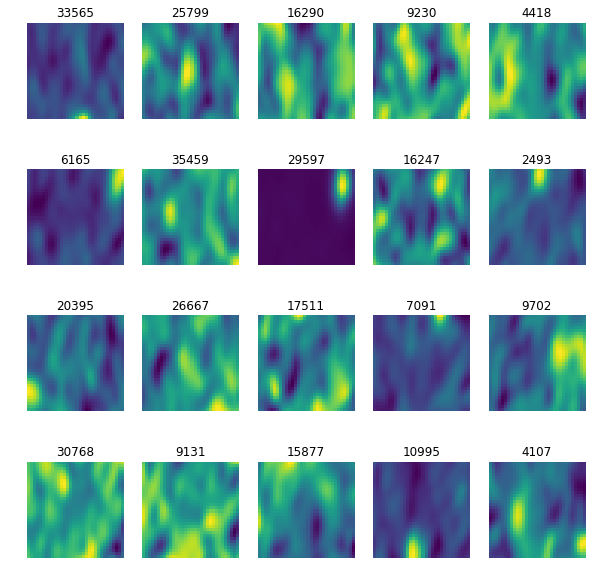

In [69]:
import matplotlib.pyplot as plt, numpy
%matplotlib inline

n = 20
plt.figure(figsize=(10, 10))
for j, i in enumerate(numpy.random.randint(0, len(features), n)):
    plt.subplot(4, 5, j + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(features[i, 0])
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
def plot_convs(k):
    plt.figure(figsize=(13, 20))
    plt.subplot2grid((16, 13), (0, 0), rowspan=16, colspan=3)
    plt.imshow(numpy.arcsinh(features[k, 0] / 0.1) / numpy.arcsinh(1 / 0.1))
    plt.axis('off')
    for i in range(3):
        out = layer_f[i]([numpy.arcsinh(features[k:k + 1] / 0.1) / numpy.arcsinh(1 / 0.1)])[0]
        for fil in range(0, 32, 1):
            plt.subplot2grid((16, 13), (fil // 2, i * 3 + 4 + fil % 2))
            plt.axis('off')
            im = out[0, fil:fil+1].transpose([1, 2, 0])
            try:
                plt.imshow(im)
            except TypeError:
                pass
    plt.savefig('/Users/alger/repos/crowdastro-projects/ATLAS-CDFS/convolutions_{}.pdf'.format(k))

In [ ]:
ks = 14825, 2531, 15087, 42191

plot_convs(ks[3])